### Case Study 2: How Can a Wellness Technology Company Play It Smart?

#### About the case study
This project is part of the Google Data Analytics Certificate program. This is a case study about Bellabeat, a tech company that manufactures health-focused smart products. Bellabeat is a small company, but they believe that they have the potential to become a larger player in the global smart device market.

#### Business Task
Bellabeat's Co-Founder and Chief Creative Officer believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. The Co-Founder wants to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.

#### Questions
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
We will start by importing the necessary libraries and loading the data sets.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

C:\Users\91810\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91810\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\91810\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Loading the data set


In [3]:
daily_activity_df = pd.read_csv("dailyActivity_merged.csv")

We will then inspect the dataset validate the data types for each column in the dataset.



In [4]:
#Inspect daily activity data
daily_activity_df.head()

#Activity date column needs to be converted into date

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


After inspecting the columns and data types of each, we can see that 'ActivityDate' column in the daily_activity_df is not formatted as date. So we need to convert them into date data type.

In [5]:
daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'])
daily_activity_df.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [6]:
#Descriptive Statistics
daily_activity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


#### Data Cleaning
In this step, we will check for missing values and add new columns that might be useful in our analysis.

In [7]:
#Check for missing values
print(daily_activity_df.isnull().sum())
daily_activity_df.drop_duplicates()
#There are no missing values

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


We will be creating columns for day of week, total active minutes, total minutes, proportion of time active, and a column to determine if it's the weekend or not to help us understand more about users behavior throughout the week.

In [8]:
#Build new column for day of week
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_df['DayOfWeek'] = daily_activity_df['ActivityDate'].dt.day_name()
#Reorder day of week
cat_type = CategoricalDtype(categories=day_of_week, ordered=True)
daily_activity_df['DayOfWeek'] = daily_activity_df['DayOfWeek'].astype(cat_type)
#Build new column for total active minutes without sedentary mins
daily_activity_df['ActiveMinutes'] = daily_activity_df['VeryActiveMinutes'] + daily_activity_df['FairlyActiveMinutes'] + daily_activity_df['LightlyActiveMinutes']
#Build new column for total time with sedentary mins
daily_activity_df['TotalMinutes'] = daily_activity_df['VeryActiveMinutes'] + daily_activity_df['FairlyActiveMinutes'] + daily_activity_df['LightlyActiveMinutes'] + daily_activity_df['SedentaryMinutes']
#Build new column for proportion of time active
daily_activity_df['ProportionOfTimeActive'] = daily_activity_df['ActiveMinutes'] / daily_activity_df['TotalMinutes'] * 100
#Build new column for is weekend
daily_activity_df['IsWeekend'] = daily_activity_df['DayOfWeek'].apply(lambda x: True if x == 'Saturday' or x == 'Sunday' else False)

In [9]:
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,ActiveMinutes,TotalMinutes,ProportionOfTimeActive,IsWeekend
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366,1094,33.455210,False
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257,1033,24.878993,False
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222,1440,15.416667,False
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272,998,27.254509,False
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267,1040,25.673077,True


Next, we will group the data by day of week to get a rough idea on the average usage or activity of the users on each day of week.



In [10]:
day_grouped = daily_activity_df.groupby(['DayOfWeek'])
day_grouped_mean = day_grouped.mean().reset_index()
day_grouped_mean

,DayOfWeek,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes,TotalMinutes,ProportionOfTimeActive
0,Monday,4.859930e+09,7780.866667,5.552917,5.528750,0.224552,1.537333,0.585833,3.363083,0.002583,23.108333,14.000000,192.058333,1027.941667,2324.208333,229.166667,1257.108333,19.576906
1,Tuesday,4.851063e+09,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158,234.631579,1241.993421,19.778973
2,Wednesday,4.815191e+09,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000,223.733333,1213.213333,19.748616
3,Thursday,4.837277e+09,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429,216.789116,1178.782313,19.979620
4,Friday,4.880997e+09,7448.230159,5.309921,5.302936,0.072186,1.312937,0.483810,3.489127,0.001825,20.055556,12.111111,204.198413,1000.309524,2331.785714,236.365079,1236.674603,20.470737
5,Saturday,4.908075e+09,8152.975806,5.854677,5.854677,0.000000,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258,2354.967742,244.266129,1208.548387,21.746426
6,Sunday,4.847640e+09,6933.231405,5.027190,5.027190,0.000000,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198,2263.000000,208.487603,1198.743802,18.880270


In [11]:
weekend_data_grouped = daily_activity_df.groupby(['IsWeekend'])
weekend_data_grouped.mean()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes,TotalMinutes,ProportionOfTimeActive
IsWeekend,,,,,,,,,,,,,,,,,
False,4.847363e+09,7668.699281,5.505108,5.485698,0.146303,1.502950,0.539165,3.369597,0.001871,21.235971,13.105036,193.535252,996.181295,2301.516547,227.876259,1224.057554,19.905384
True,4.878228e+09,7550.571429,5.446000,5.446000,0.000000,1.501918,0.648041,3.259184,0.000857,20.963265,14.869388,190.763265,977.110204,2309.546939,226.595918,1203.706122,20.330896


## Data Visualization


We will be using matplotlib and seaborn to visualize our data.

Here, we would like to see if being more active means more calories burned throughout the day. So we created scatterplots for calories burned, total steps, and active minutes to see the relationship between the variables.

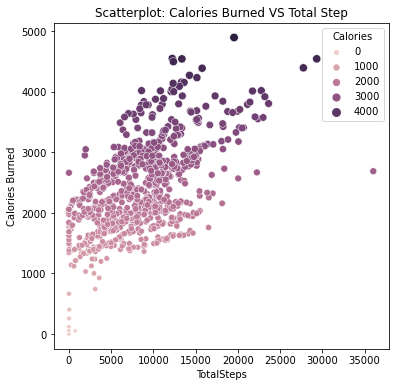

In [12]:
#Scatterplot for calories and total steps
f, ax1 = plt.subplots(figsize=(6,6))
sns.scatterplot(x='TotalSteps', y='Calories', data=daily_activity_df, hue='Calories', size='Calories')
plt.title("Scatterplot: Calories Burned VS Total Step")
plt.ylabel("Calories Burned")
plt.show()

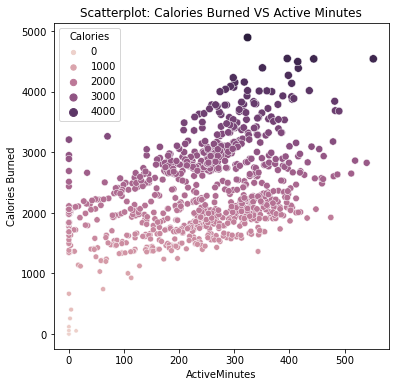

In [13]:
f, ax2 = plt.subplots(figsize=(6,6))
sns.scatterplot(x='ActiveMinutes', y='Calories', data=daily_activity_df, hue='Calories', size='Calories')
plt.title("Scatterplot: Calories Burned VS Active Minutes")
plt.ylabel("Calories Burned")
plt.show()

We can see from the scatterplots that calories, total steps, and active minutes are positively correlated. This tells us that the more active the user is the more calories burned throughout the day.

But we wanted to see if there are any trends in the smart device usage among users.

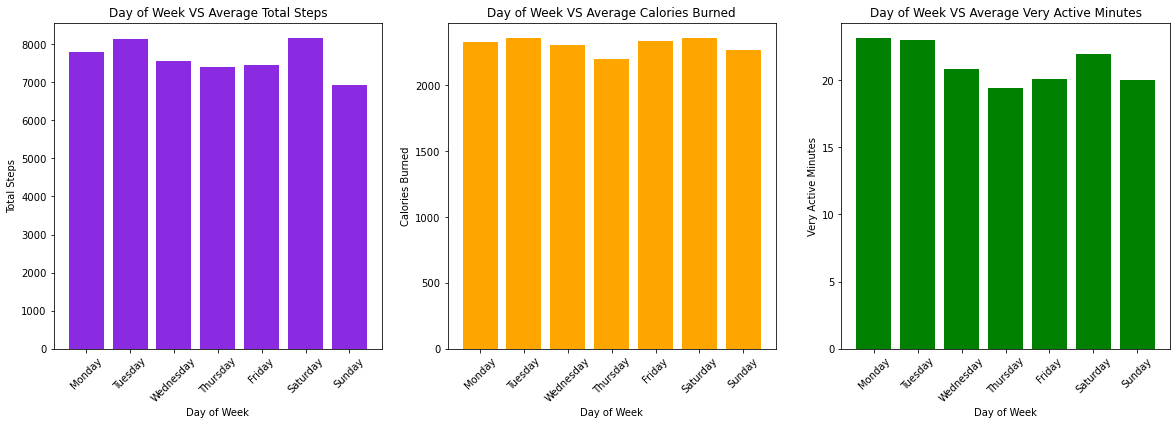

In [14]:
#Day Grouped Viz
fig = plt.figure(figsize=(20,6))
ax4 = plt.subplot(131)
plt.bar(data=day_grouped_mean, x='DayOfWeek', height='TotalSteps', color='blueviolet')
plt.title("Day of Week VS Average Total Steps")
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Total Steps')

ax5 = fig.add_subplot(132)
plt.bar(data=day_grouped_mean, x='DayOfWeek', height='Calories', color='orange')
plt.title("Day of Week VS Average Calories Burned")
plt.xlabel('Day of Week')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)

ax6 = fig.add_subplot(133)
plt.bar(data=day_grouped_mean, x='DayOfWeek', height='VeryActiveMinutes', color='green')
plt.title("Day of Week VS Average Very Active Minutes")
plt.xlabel('Day of Week')
plt.ylabel('Very Active Minutes')
plt.xticks(rotation=45)
plt.show()

Looking at the bar charts, smart device users' usage seem to be consistent throughout the week.



Text(0.5, 1.0, 'Correlation Heatmap')

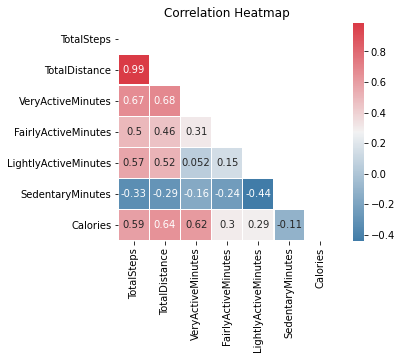

In [15]:
#Correlation Heatmap
corr_df = daily_activity_df[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr_df.corr(), mask=mask, cmap=cmap, square=True, linewidths=.5, annot=True).set_title('Correlation Heatmap')

To better understand trends in smart device usage, we will be adding another dataset with sleep data to understand the users' sleeping pattern.



In [17]:
#Inspect daily sleep data
daily_sleep_df = pd.read_csv("sleepDay_merged.csv")
daily_sleep_df.head(10)
daily_sleep_df.info()
daily_sleep_df['SleepDay'] = pd.to_datetime(daily_sleep_df['SleepDay'])
daily_sleep_df.dtypes
daily_sleep_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [18]:
merged_df = daily_activity_df.merge(daily_sleep_df, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,DayOfWeek,ActiveMinutes,TotalMinutes,ProportionOfTimeActive,IsWeekend,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,Tuesday,366,1094,33.455210,False,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,Wednesday,257,1033,24.878993,False,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,Friday,272,998,27.254509,False,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,Saturday,267,1040,25.673077,True,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,1728,Sunday,222,761,29.172142,True,2016-04-17,1,700,712


Now that we have merged and added the sleeping data, we could further analyze the data.



In [19]:
#Check for missing values
print(merged_df.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DayOfWeek                   0
ActiveMinutes               0
TotalMinutes                0
ProportionOfTimeActive      0
IsWeekend                   0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64


In [20]:
#Drop SleepDay column since it's the same as ActivityDate
merged_df = merged_df.drop(['SleepDay'], axis=1)

In [21]:
#Check
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,DayOfWeek,ActiveMinutes,TotalMinutes,ProportionOfTimeActive,IsWeekend,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,Tuesday,366,1094,33.455210,False,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,Wednesday,257,1033,24.878993,False,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,Friday,272,998,27.254509,False,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,Saturday,267,1040,25.673077,True,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,539,1728,Sunday,222,761,29.172142,True,1,700,712


[]

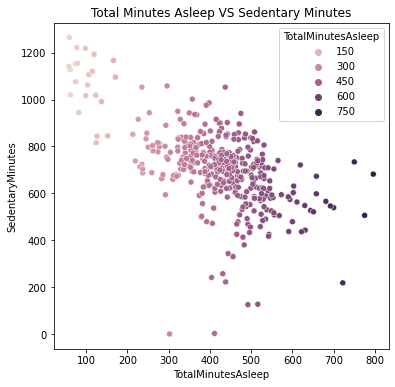

In [22]:
f, ax7 = plt.subplots(figsize=(6,6))
sns.scatterplot(data=merged_df, x='TotalMinutesAsleep', y='SedentaryMinutes', hue='TotalMinutesAsleep')
plt.title('Total Minutes Asleep VS Sedentary Minutes')
plt.plot()

We can see from the scatterplot that there seem to be a correlation between sedentary minutes and total minutes sleep. The less sedentary a user is the more sleep they are getting.



In [23]:
#Create a pivot table for day of week
table = pd.pivot_table(merged_df, values='TotalMinutesAsleep', index='DayOfWeek')

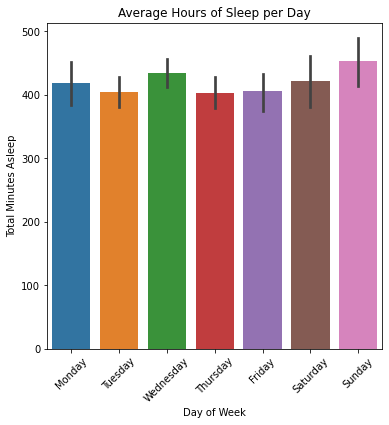

In [24]:
f, ax9 = plt.subplots(figsize=(6,6))
sns.barplot(data=merged_df, x='DayOfWeek', y='TotalMinutesAsleep')
plt.title('Average Hours of Sleep per Day')
plt.xlabel('Day of Week')
plt.ylabel('Total Minutes Asleep')
plt.xticks(rotation=45)
plt.show()

The bar plot generated shows us that the average sleeping time is pretty consistent throughout the week.

Next, let's see how the different variables are distributed



<AxesSubplot:xlabel='ProportionOfTimeActive', ylabel='Count'>

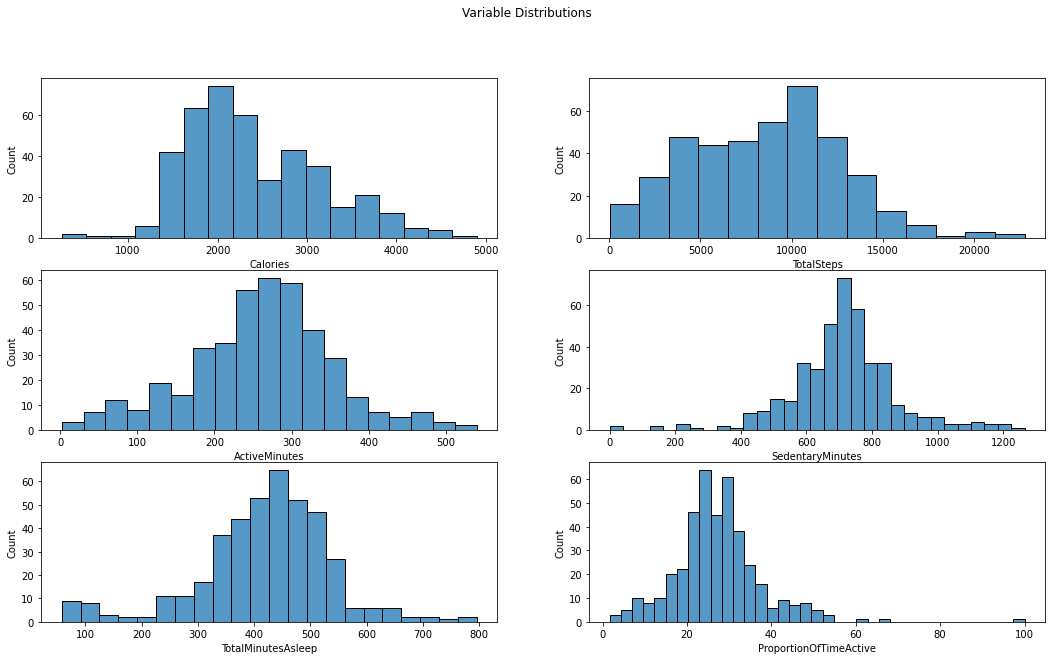

In [25]:
fig10, ax10 = plt.subplots(3, 2, figsize=(18,10))
fig10.suptitle('Variable Distributions')
sns.histplot(merged_df, x='Calories', ax=ax10[0,0])
sns.histplot(merged_df, x='TotalSteps', ax=ax10[0,1])
sns.histplot(merged_df, x='ActiveMinutes', ax=ax10[1,0])
sns.histplot(merged_df, x='SedentaryMinutes', ax=ax10[1,1])
sns.histplot(merged_df, x='TotalMinutesAsleep', ax=ax10[2,0])
sns.histplot(merged_df, x='ProportionOfTimeActive', ax=ax10[2,1])

In [26]:
#Categorize Sleep amount in users
def sleepAmount(x):
    if x/60 < 6:
        return 'Inadequate Sleep'
    elif (x/60) >= 6 and (x/60) < 8:
        return 'Adequate Sleep'
    else:
        return 'Too Much Sleep'
merged_df['SleepAmount'] = merged_df['TotalMinutesAsleep'].apply(sleepAmount)

Let's create a new column to categorize users as active or sedentary user to better understand the users' sleep pattern



In [27]:
merged_df['UserType'] = (merged_df['VeryActiveMinutes'] + merged_df['FairlyActiveMinutes']).apply(lambda x: 'Active User' if x > 60 else 'Sedentary User')


<AxesSubplot:xlabel='SleepAmount', ylabel='count'>

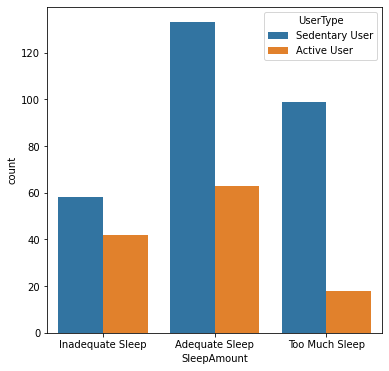

In [28]:
#categorize active user and sedentary user
fig11, ax11 = plt.subplots(figsize=(6,6))
sns.countplot(data=merged_df, x='SleepAmount', hue='UserType')

In [29]:
grouped_type = merged_df.groupby(['UserType', 'SleepAmount']).agg({'Id': "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
grouped_type

Id
UserType       SleepAmount                
Active User    Adequate Sleep    51.219512
               Inadequate Sleep  34.146341
               Too Much Sleep    14.634146
Sedentary User Adequate Sleep    45.862069
               Inadequate Sleep  20.000000
               Too Much Sleep    34.137931

In [30]:
grouped_type_df = grouped_type.reset_index()
grouped_type_df

,UserType,SleepAmount,Id
0,Active User,Adequate Sleep,51.219512
1,Active User,Inadequate Sleep,34.146341
2,Active User,Too Much Sleep,14.634146
3,Sedentary User,Adequate Sleep,45.862069
4,Sedentary User,Inadequate Sleep,20.000000
5,Sedentary User,Too Much Sleep,34.137931


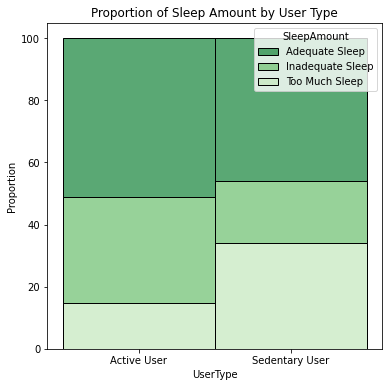

In [31]:
plt.subplots(figsize=(6,6))
sns.histplot(data=grouped_type_df, x='UserType', hue='SleepAmount', weights='Id', multiple='stack', palette='Greens_r')
plt.title('Proportion of Sleep Amount by User Type')
plt.ylabel('Proportion')
plt.show()

We can see here that active users have a higher proportion of getting inadequate sleep than sedentary users. This can help Bellabeat improve its products by focusing on sleep patterns by adding features such as a reminder to go to bed.

### Takeaways
Most users in this dataset are sedentary users, which means that they are not working out at least 60 minutes per day. This could be due to working a 9-5 job for most. Their activity level throughout the week is pretty consistent. Analyzing the sleeping data gives us more insight on the sleeping pattern of users. A larger proportion of active users do not get adequate sleep compared to sedentary users while a larger proportion of sedentary users get too much sleep.

These trends in sleeping pattern among smart device users can help Bellabeat with its marketing strategy. Bellabeat can focus more on marketing its sleep tracking feature in order to stand out from its competitors because the analysis shows that even with the smart devices, roughly about 50% of users are either not getting enough sleep or sleeping too much. Bellabeat can also use these information on sleeping pattern to develop/improve its sleep tracking feature by adding sleep notifications, or a reminder for reducing sedentary time to improve their sleep.

### Further Analysis
Due to the small sample size of just around 30 participants in the dataset and data only from one type of smart device, with more time and more data we can better understand the trends of smart device users. As more data are collected we can understand the effect of weather/season changes on a user activity, how the users' location affect smart device usage. Furthermore, Bellabeat can conduct surveys and collect data from product reviews to improve its product.

Data Source: https://www.kaggle.com/arashnic/fitbit